Generating a 32-bar drum loop using samples.

Experiments : 

1. Evaluate overlay vs add
2. Try different techniques to improve audio quality
3. Drum step sequencing interface

In [49]:
from pydub import AudioSegment

# Load drum samples
kick = AudioSegment.from_file("E:/Music - Extracts/Sample Packs/Cymatics - Future Bass Starter Pack/Drums - One Shots/Kicks/Cymatics - Future Bass Kick 2 - E.wav")
snare = AudioSegment.from_file("E:/Music - Extracts/Sample Packs/Cymatics - Future Bass Starter Pack/Drums - One Shots/Snares/Cymatics - Future Bass Snare 1 - C.wav")
hihat = AudioSegment.from_file("E:/Music - Extracts/Sample Packs/Cymatics - Future Bass Starter Pack/Drums - One Shots/Cymbals/Hihats - Closed/Cymatics - Future Bass Hihat 2.wav")

# Define the drum hit patterns for each step of the 8-bar loop
# Each inner list represents one step, where 1 indicates presence of the drum element and 0 indicates absence
# Example: patterns[0][0] represents the first step of the first bar
patterns = [
    # First bar
    [[1, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],  
    # Second bar
    [[0, 1, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],  
    # Third bar
    [[1, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
    # Fourth bar
    [[0, 1, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
    # Fifth bar
    [[1, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
    # Sixth bar
    [[0, 1, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
    # Seventh bar
    [[1, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
    # Eighth bar
    [[0, 1, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
]


# Set the tempo (in milliseconds per step)
tempo = 120  # adjust tempo as needed

num_steps = 4   # steps per beat
num_beats = 4   # beats per bar
num_bars = 8    # total bars

# Initialize the drum loop as a silent audio segment
drum_loop = AudioSegment.silent(duration= num_beats * num_bars * 60 / tempo)

# Add drum hits to the drum loop
for i in range(num_bars):  # for each bar
    for j in range(num_beats):  # for each beat in the bar
        for k in range(num_steps):  # for each step in the beat
            pattern = patterns[i % len(patterns)][j]  # get the pattern for the current step
            if pattern[0] == 1:
                drum_loop = drum_loop[:(((i * num_bars + j * num_beats + k * num_steps) * tempo))] + kick
            if pattern[1] == 1:
                drum_loop = drum_loop[:(((i * num_beats * num_steps + j * num_steps + k) * tempo))] + snare + drum_loop[(((i * num_beats * num_steps + j * num_steps + k) * tempo)):]
            if pattern[2] == 1:
                drum_loop = drum_loop[:(((i * num_beats * num_steps + j * num_steps + k) * tempo))] + hihat + drum_loop[(((i * num_beats * num_steps + j * num_steps + k) * tempo)):]

# Export the drum loop as an audio file
drum_loop.export("drum_loop.wav", format="wav")


<_io.BufferedRandom name='drum_loop.wav'>

MoviePy vs PyDub

In [51]:
from pydub import AudioSegment

# Load drum samples
kick = AudioSegment.from_file("E:/Music - Extracts/Sample Packs/Cymatics - Future Bass Starter Pack/Drums - One Shots/Kicks/Cymatics - Future Bass Kick 2 - E.wav")
snare = AudioSegment.from_file("E:/Music - Extracts/Sample Packs/Cymatics - Future Bass Starter Pack/Drums - One Shots/Snares/Cymatics - Future Bass Snare 1 - C.wav")
hihat = AudioSegment.from_file("E:/Music - Extracts/Sample Packs/Cymatics - Future Bass Starter Pack/Drums - One Shots/Cymbals/Hihats - Closed/Cymatics - Future Bass Hihat 2.wav")

# Create an empty audio segment for the drum loop
drum_loop = AudioSegment.silent(duration=4000)

# drum_loop = drum_loop.overlay(kick)
# drum_loop = drum_loop.overlay(snare)
# drum_loop = drum_loop.overlay(hihat)

drum_loop = drum_loop.overlay(kick, position=0)
drum_loop = drum_loop.overlay(snare, position=0)


# Export the drum loop as an audio file
drum_loop.export("drum_loop.wav", format="wav")

from moviepy.editor import AudioFileClip, concatenate_audioclips

# Load the audio clips
clip1 = AudioFileClip("E:/Music - Extracts/Sample Packs/Cymatics - Future Bass Starter Pack/Drums - One Shots/Kicks/Cymatics - Future Bass Kick 2 - E.wav")
clip2 = AudioFileClip("E:/Music - Extracts/Sample Packs/Cymatics - Future Bass Starter Pack/Drums - One Shots/Snares/Cymatics - Future Bass Snare 1 - C.wav")

# Concatenate the audio clips
combined_clip = concatenate_audioclips([clip1, clip2])

# Export the combined audio clip
combined_clip.write_audiofile("combined_audio.mp3")

# Overlay audio_clip2 onto audio_clip1
overlayed_audio = audio_clip1.overlay(audio_clip2)

# Write the result to a new audio file
overlayed_audio.write_audiofile("overlayed_audio.mp3")


MoviePy - Writing audio in combined_audio.mp3


MoviePy - Done.


AttributeError: 'AudioFileClip' object has no attribute 'overlay'

In [17]:
from pydub import AudioSegment

# Load drum samples
kick = AudioSegment.from_file("kick.wav")
snare = AudioSegment.from_file("snare.wav")
hihat = AudioSegment.from_file("hihat.wav")

# Define the sequence of drum hits for each bar (example sequence)
kick_sequence =  [1, 0, 0, 0]  # 1 represents kick drum, 0 represents silence
snare_sequence = [0, 1, 0, 0]  # 1 represents snare drum, 0 represents silence
hihat_sequence = [1, 0, 1, 0]  # 1 represents hi-hat, 0 represents silence

# Set the tempo (in milliseconds per beat)
tempo = 150  # adjust tempo as needed

num_steps = 4   # steps per beat
num_beats = 4   # beats per bar
num_bars = 8    # total bars

# Initialize the drum loop as a silent audio segment
drum_loop = AudioSegment.silent(duration=num_steps * num_beats * num_bars * 60 * 1000 / tempo)

# Add drum hits to the drum loop
for i in range(num_bars):  # for each bar
    for j in range(num_beats):  # for each beat in the bar
        for k in range(num_steps):  # for each step in the beat
            if kick_sequence[k] == 1:
                drum_loop = drum_loop[:(((i * num_beats + j) * num_steps + k) * tempo)] + kick + drum_loop[(((i * num_beats + j) * num_steps + k) * tempo):]
            if snare_sequence[k] == 1:
                drum_loop = drum_loop[:(((i * num_beats + j) * num_steps + k) * tempo)] + snare + drum_loop[(((i * num_beats + j) * num_steps + k) * tempo):]
            if hihat_sequence[k] == 1:
                drum_loop = drum_loop[:(((i * num_beats + j) * num_steps + k) * tempo)] + hihat + drum_loop[(((i * num_beats + j) * num_steps + k) * tempo):]

# Export the drum loop as an audio file
drum_loop.export("drum_loop.wav", format="wav")


<_io.BufferedRandom name='drum_loop.wav'>

Random Forest Classifier for Sample Genre Idenfication

In [53]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import librosa

# Step 1: Data Preprocessing and Feature Extraction
def extract_features(audio_file):
    y, sr = librosa.load(audio_file)  # Load audio file
    features = []
    # Extract features (you can experiment with different features)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    features.append(np.mean(chroma))
    features.append(np.mean(mfcc))
    features.append(np.mean(rms))
    features.append(np.mean(spectral_centroid))
    features.append(np.mean(spectral_bandwidth))
    features.append(np.mean(spectral_contrast))
    return features

# Step 2: Load and preprocess data
data_dir = "E:/Dataset/Sample_Genre_Classification/snare"
snare_types = ["dubstep", "future_bass", "hip_hop","house", "lofi", "trap"]  # Example snare types
X = []
y = []
for snare_type in snare_types:
    snare_files = os.listdir(os.path.join(data_dir, snare_type))
    for snare_file in snare_files:
        audio_file = os.path.join(data_dir, snare_type, snare_file)
        features = extract_features(audio_file)
        X.append(features)
        y.append(snare_type)

# Convert labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert labels to one-hot encoding
y_categorical = to_categorical(y_encoded)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Step 4: Reshape features for input to LSTM
X_train = np.reshape(X_train, (len(X_train), 1, len(X_train[0])))
X_test = np.reshape(X_test, (len(X_test), 1, len(X_test[0])))

# Step 5: Build the LSTM model
model = Sequential([
    LSTM(64, input_shape=(1, 6), return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 output neurons for 3 snare types
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the LSTM model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Step 7: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


In [10]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import librosa
import tensorflow as tf

# Check if GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("GPU not found. Training on CPU.")

# Step 1: Data Preprocessing and Feature Extraction
def extract_features(audio_file, features_to_extract):
    y, sr = librosa.load(audio_file)  # Load audio file
    features = []
    
    # Extract selected features
    if 'chroma' in features_to_extract:
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        features.append(np.mean(chroma))
    if 'mfcc' in features_to_extract:
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        features.append(np.mean(mfcc))
    if 'rms' in features_to_extract:
        rms = librosa.feature.rms(y=y)
        features.append(np.mean(rms))
    if 'spectral_centroid' in features_to_extract:
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        features.append(np.mean(spectral_centroid))
    if 'spectral_bandwidth' in features_to_extract:
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        features.append(np.mean(spectral_bandwidth))
    if 'spectral_contrast' in features_to_extract:
        spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
        features.append(np.mean(spectral_contrast))
    if 'zero_crossing_rate' in features_to_extract:
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
        features.append(np.mean(zero_crossing_rate))
    if 'spectral_rolloff' in features_to_extract:
        spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        features.append(np.mean(spectral_rolloff))
    if 'temporal_centroid' in features_to_extract:
        temporal_centroid = np.sum(np.arange(len(y)) * y) / np.sum(np.abs(y))
        features.append(temporal_centroid)
    if 'spectral_flatness' in features_to_extract:
        spectral_flatness = librosa.feature.spectral_flatness(y=y)
        features.append(np.mean(spectral_flatness))
    # Add code to extract 'pitch' feature using librosa or any other library
    
    return features

# Step 2: Load and preprocess data
data_dir = "E:/Dataset/Sample_Genre_Classification/snare"
snare_types = ["dubstep", "future_bass", "hip_hop","house", "lofi", "trap"]  # Example snare types
X = []
y = []
for snare_type in snare_types:
    snare_files = os.listdir(os.path.join(data_dir, snare_type))
    for snare_file in snare_files:
        audio_file = os.path.join(data_dir, snare_type, snare_file)
        # Pass the desired features to extract
        
        # 'chroma', 'mfcc', 'rms', 'spectral_centroid', 'spectral_bandwidth', 'spectral_contrast', 'zero_crossing_rate',
        #'spectral_rolloff', 'temporal_centroid', 'spectral_flatness'
        features = extract_features(audio_file, features_to_extract=['chroma', 'mfcc', 'rms', 'spectral_centroid', 'spectral_bandwidth', 'spectral_contrast'])
        X.append(features)
        y.append(snare_type)

# Convert labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert labels to one-hot encoding
y_categorical = to_categorical(y_encoded)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Step 4: Reshape features for input to LSTM
X_train = np.reshape(X_train, (len(X_train), 1, len(X_train[0])))
X_test = np.reshape(X_test, (len(X_test), 1, len(X_test[0])))

# Hyperparameter tuning options
lstm_units = [32, 64, 128]
dropout_rates = [0.3, 0.5, 0.7]
dense_units = [16, 32, 64]
learning_rates = [0.001, 0.0001]
num_epochs = [50, 100]
batch_sizes = [32, 64]

best_accuracy = 0
best_hyperparameters = {}

for lstm_unit in lstm_units:
    for dropout_rate in dropout_rates:
        for dense_unit in dense_units:
            for learning_rate in learning_rates:
                for epochs in num_epochs:
                    for batch_size in batch_sizes:
                        # Step 5: Build the LSTM model
                        model = Sequential([
                            LSTM(lstm_unit, input_shape=(1, 6), return_sequences=False),
                            Dropout(dropout_rate),
                            Dense(dense_unit, activation='relu'),
                            Dropout(dropout_rate),
                            Dense(6, activation='softmax')  # 6 output neurons for 6 snare types
                        ])

                        # Compile the model
                        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

                        # Step 6: Train the LSTM model
                        print(f"Training model with: LSTM units={lstm_unit}, Dropout={dropout_rate}, Dense units={dense_unit}, Learning rate={learning_rate}, Epochs={epochs}, Batch size={batch_size}")
                        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

                        # Step 7: Evaluate the model
                        loss, accuracy = model.evaluate(X_test, y_test)
                        print(f"Test Accuracy: {accuracy}")
                        print("-" * 50)

                        # Check if current model has better accuracy
                        if accuracy > best_accuracy:
                            best_accuracy = accuracy
                            best_hyperparameters = {
                                'lstm_units': lstm_unit,
                                'dropout_rate': dropout_rate,
                                'dense_units': dense_unit,
                                'learning_rate': learning_rate,
                                'epochs': epochs,
                                'batch_size': batch_size
                            }

print("Best Hyperparameters:", best_hyperparameters)
print("Best Accuracy:", best_accuracy)


GPU not found. Training on CPU.
Training model with: LSTM units=32, Dropout=0.3, Dense units=16, Learning rate=0.001, Epochs=50, Batch size=32
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x000001DE8CA228C0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x000001DE8CA228C0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .p

KeyboardInterrupt: 

In [1]:
import os
import librosa
import soundfile as sf  # Importing soundfile module for writing WAV files
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift

# Define the directory containing the snare audio files
data_dir = "E:/Dataset/Sample_Genre_Classification/snare"
output_dir = "E:/Dataset/Sample_Genre_Classification/snare_augmented"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Initialize audiomentations transformations
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.2, p=0.5),
    PitchShift(min_semitones=-2, max_semitones=2, p=0.5)
])

# Iterate through each label folder
for label_folder in os.listdir(data_dir):
    label_folder_path = os.path.join(data_dir, label_folder)
    if os.path.isdir(label_folder_path):
        output_label_folder_path = os.path.join(output_dir, label_folder)
        os.makedirs(output_label_folder_path, exist_ok=True)
        # Iterate through each snare audio file
        for file in os.listdir(label_folder_path):
            if file.endswith(".wav"):
                audio_path = os.path.join(label_folder_path, file)
                # Load the audio file
                y, sr = librosa.load(audio_path, sr=None)
                # Apply data augmentation
                augmented_samples = augment(samples=y, sample_rate=sr)
                # Write augmented samples to new audio files
                for i, augmented_sample in enumerate(augmented_samples):
                    output_path = os.path.join(output_label_folder_path, f"{file.split('.')[0]}_aug_{i}.wav")
                    # Use soundfile to write audio data to WAV file
                    sf.write(output_path, augmented_sample, sr)


IndexError: tuple index out of range

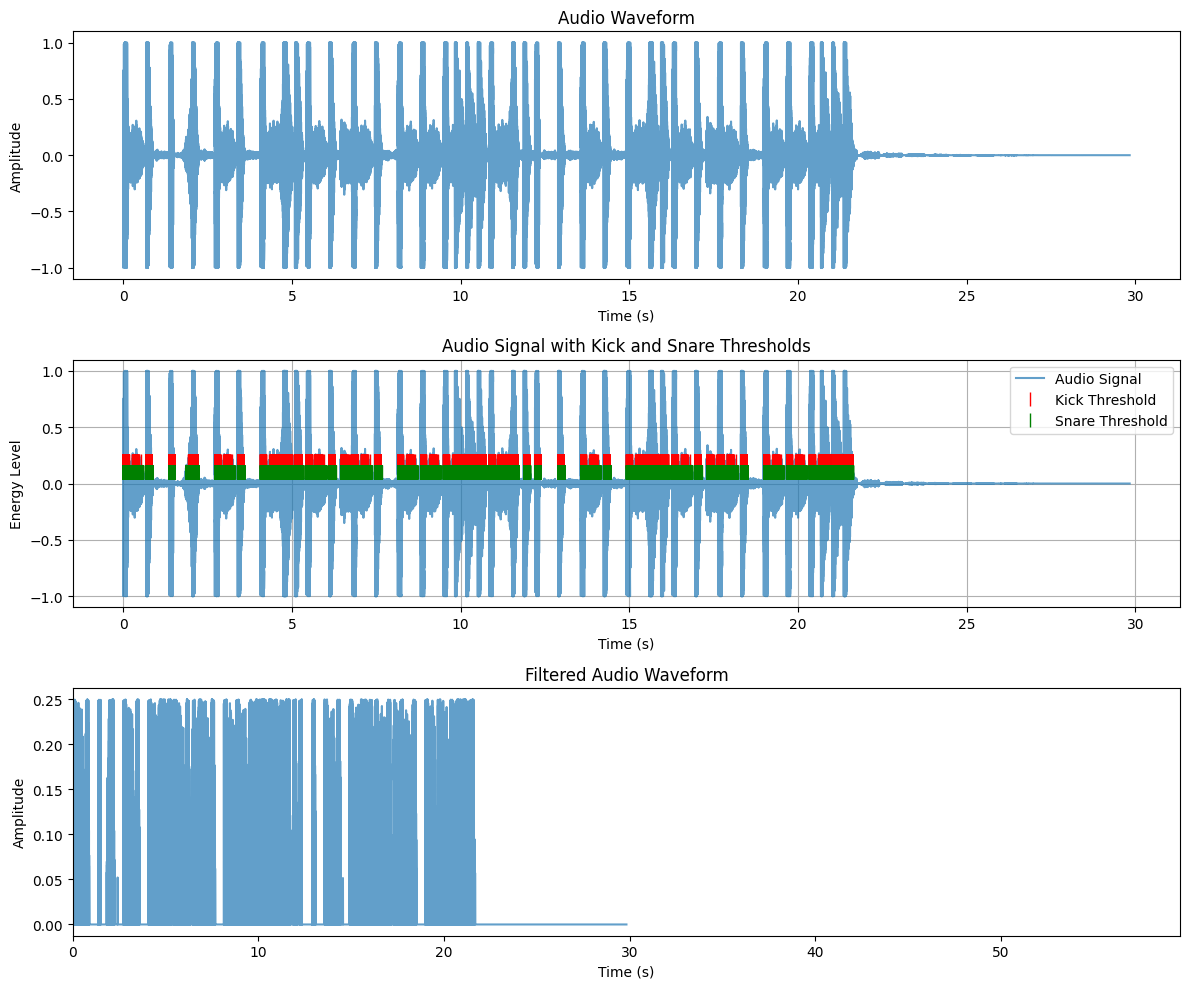

Kick Steps: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [16]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def detect_kick_snare_locations(audio_file, bpm, kick_threshold=0.2, snare_threshold=0.1, energy_threshold_low=0.05, energy_threshold_high=0.25):
    # Load the audio file with higher quality resampling
    y, sr = librosa.load(audio_file, sr=None, res_type='kaiser_fast')

    # Calculate duration of a beat in seconds
    beat_duration = 60 / bpm

    # Calculate duration of a step in seconds (assuming 4 steps per beat)
    step_duration = beat_duration / 4

    # Detect energy peaks for kick and snare
    kick_peaks = np.where(y > kick_threshold)[0]
    snare_peaks = np.where(y > snare_threshold)[0]

    # Calculate time locations of kick and snare hits
    kick_locations = librosa.samples_to_time(kick_peaks, sr=sr)
    snare_locations = librosa.samples_to_time(snare_peaks, sr=sr)

    # Calculate step locations for kick and snare hits
    kick_steps = [int(loc / step_duration) % 4 for loc in kick_locations]
    snare_steps = [int(loc / step_duration) % 4 for loc in snare_locations]

    # Remove data points where energy is below energy_threshold_low or above energy_threshold_high
    y_filtered = np.where((y > energy_threshold_low) & (y < energy_threshold_high), y, 0)

    # Plot the audio waveform, energy levels, and filtered audio
    plt.figure(figsize=(12, 10))

    # Plot the audio waveform
    plt.subplot(3, 1, 1)
    plt.plot(np.arange(len(y)) / sr, y, alpha=0.7)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Audio Waveform')

    # Plot the energy levels
    plt.subplot(3, 1, 2)
    sns.lineplot(x=np.arange(len(y)) / sr, y=y, alpha=0.7, label='Audio Signal')
    plt.plot(kick_locations, np.ones_like(kick_locations) * kick_threshold, '|', color='r', markersize=10, label='Kick Threshold')
    plt.plot(snare_locations, np.ones_like(snare_locations) * snare_threshold, '|', color='g', markersize=10, label='Snare Threshold')
    plt.xlabel('Time (s)')
    plt.ylabel('Energy Level')
    plt.title('Audio Signal with Kick and Snare Thresholds')
    plt.legend()
    plt.grid(True)

    # Plot the filtered audio
    plt.subplot(3, 1, 3)
    plt.plot(np.arange(len(y_filtered)) / sr, y_filtered, alpha=0.7)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Filtered Audio Waveform')

    # Set wider x-axis range for better visualization
    plt.xlim(0, 2 * len(y) / sr)  # Stretch the xlabel scale by 2x

    plt.tight_layout()
    plt.show()

    return kick_steps, snare_steps

# Example usage
audio_file = "E:/Dataset/Sample_Genre_Classification/Cymatics - Drum Loop 1 - 177 BPM.wav"
bpm = 177  # Example BPM
kick_steps, snare_steps = detect_kick_snare_locations(audio_file, bpm)

print("Kick Steps:", kick_steps)
print("Snare Steps:", snare_steps)


Length of time series data: 1315526


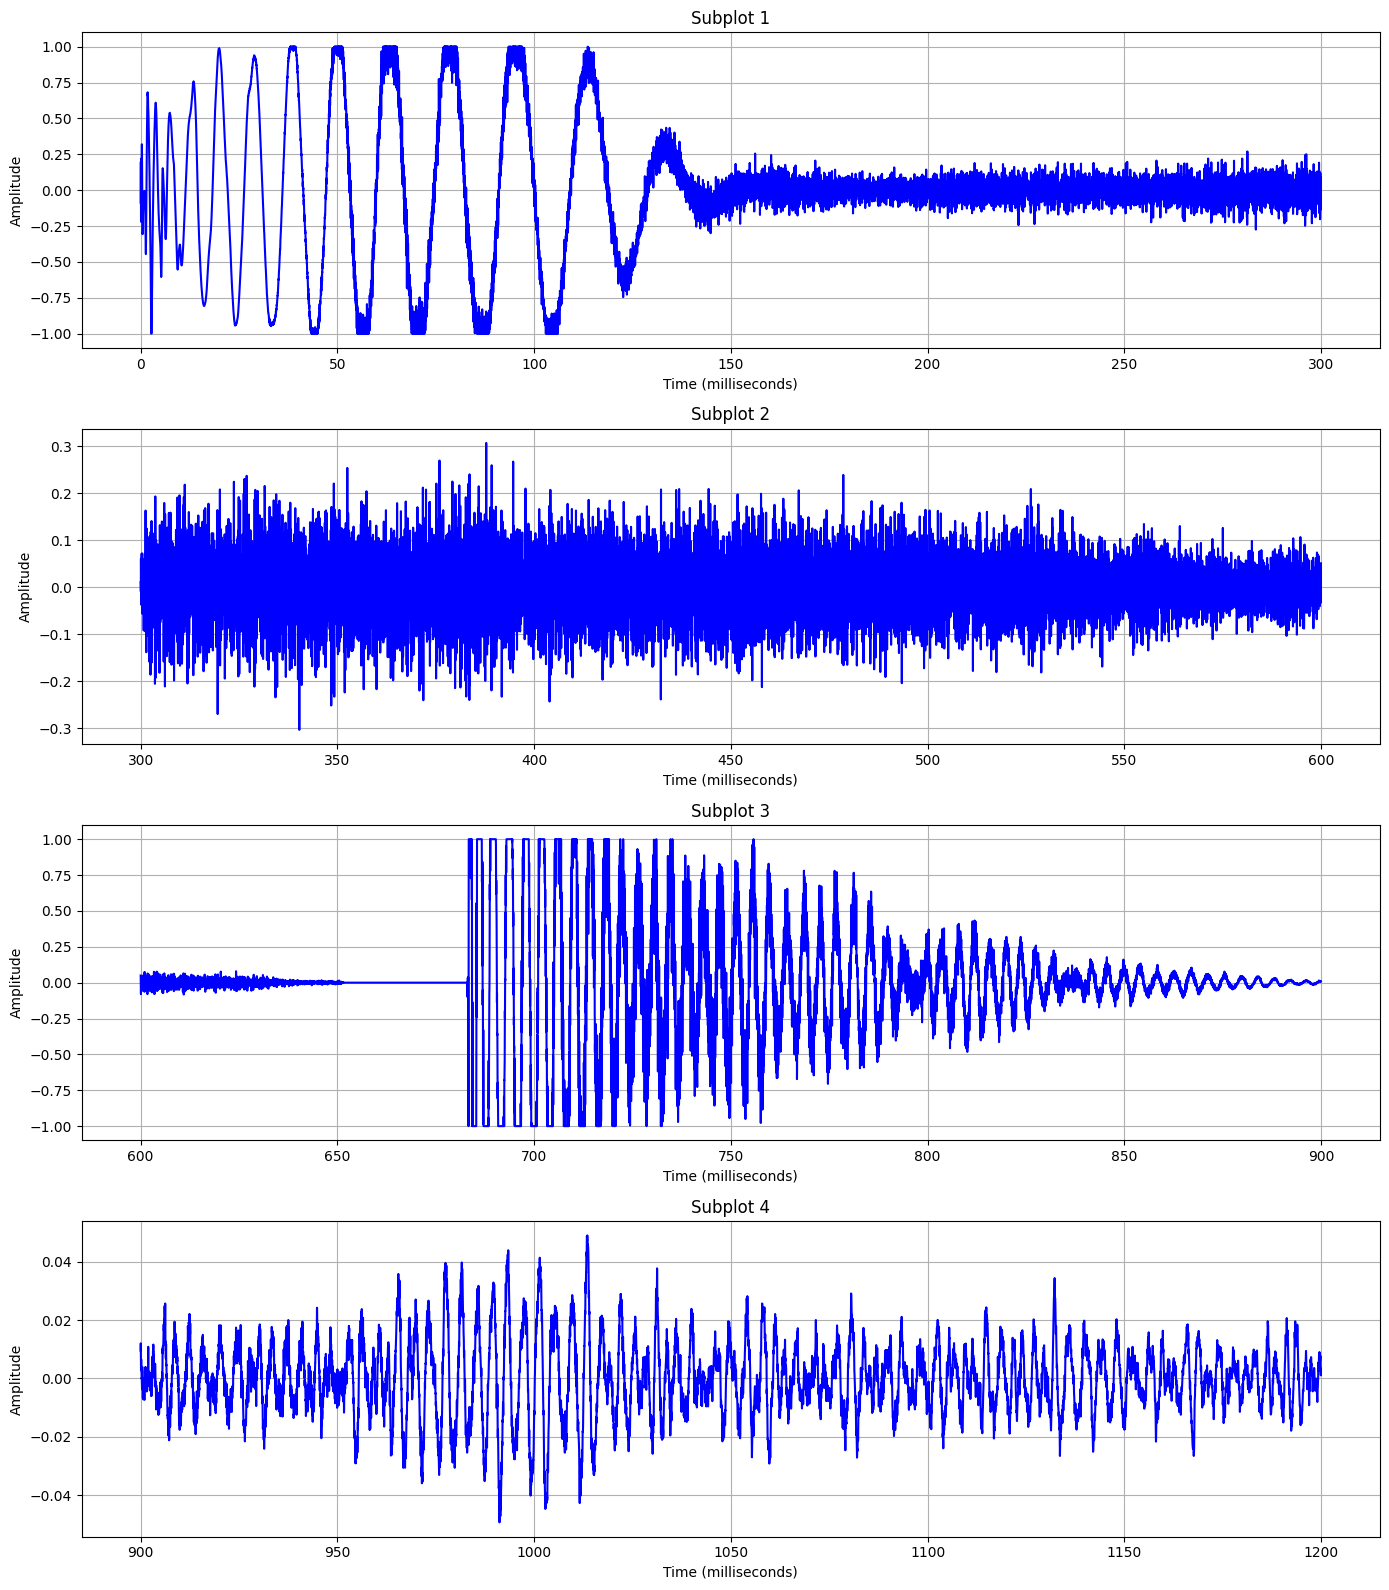

In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Load the audio file
audio_file = "E:/Dataset/Sample_Genre_Classification/Cymatics - Drum Loop 1 - 177 BPM.wav"
y, sr = librosa.load(audio_file, sr=None, dtype=np.float32)

# Normalize the audio to ensure amplitude values are in the range [-1, 1]
y /= np.max(np.abs(y))

# Calculate the time array with a higher precision (10 ms)
time = np.arange(len(y)) / sr
time_ms = time * 1000  # Convert time to milliseconds

# Convert time array to human-readable format
start_time = datetime.datetime.fromtimestamp(0)  # Start time at Unix epoch
time_readable = [start_time + datetime.timedelta(seconds=float(t)) for t in time]

# Print the length of the time series data
print("Length of time series data:", len(time))

# Plot only the first 4 subplots
num_subplots = min(4, int(np.ceil(len(y) / (sr * 0.3))))  # Each subplot represents 300 milliseconds

plt.figure(figsize=(14, 4 * num_subplots))
for i in range(num_subplots):
    start_idx = int(i * sr * 0.3)
    end_idx = int((i + 1) * sr * 0.3)
    plt.subplot(num_subplots, 1, i + 1)
    plt.plot(time_ms[start_idx:end_idx], y[start_idx:end_idx], color='b')
    plt.xlabel('Time (milliseconds)')
    plt.ylabel('Amplitude')
    plt.title(f'Subplot {i+1}')
    plt.grid(True)

plt.tight_layout()
plt.show()



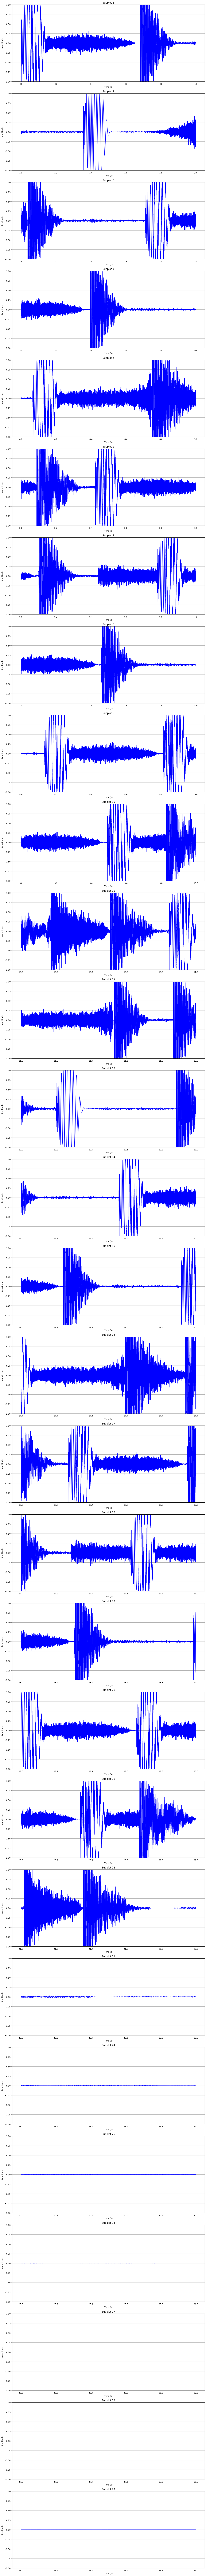

Sequence 1:
- Time Duration: 0.00 seconds
Sequence 2:
- Time Duration: 0.00 seconds
Sequence 3:
- Time Duration: 0.00 seconds
Sequence 4:
- Time Duration: 0.00 seconds
Sequence 5:
- Time Duration: 0.00 seconds
Sequence 6:
- Time Duration: 0.00 seconds
Sequence 7:
- Time Duration: 0.00 seconds
Sequence 8:
- Time Duration: 0.00 seconds
Sequence 9:
- Time Duration: 0.00 seconds


In [11]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
audio_file = "E:/Dataset/Sample_Genre_Classification/Cymatics - Drum Loop 1 - 177 BPM.wav"
y, sr = librosa.load(audio_file, sr=None)

# Parameters
amplitude_change_threshold = 0.5  # Amplitude change threshold (50%)
subplot_duration = 0.5  # Duration of each subplot in seconds

# Calculate the time array
time = np.arange(len(y)) / sr

# Perform short-time Fourier transform (STFT)
hop_length = int(sr * subplot_duration)
n_fft = 2048
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

# Convert amplitude spectrogram to dB
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Compute the spectral centroid
spectral_centroids = librosa.feature.spectral_centroid(S=np.abs(D), sr=sr)

# Identify sequences based on amplitude change
sequences = []
start_time = None
for i in range(len(spectral_centroids[0])):
    amplitude = np.max(np.abs(y[i*hop_length:(i+1)*hop_length]))
    if start_time is None:
        start_time = time[i]
        prev_amplitude = amplitude
    elif np.abs(amplitude - prev_amplitude) > amplitude_change_threshold:
        end_time = time[i-1]
        sequences.append((start_time, end_time))
        start_time = time[i]
        prev_amplitude = amplitude

# Plot the audio waveform with subplots for each sequence
num_subplots = len(y) // (hop_length * 2)  # Each subplot covers 500ms
plt.figure(figsize=(14, 6*num_subplots))
for i in range(num_subplots):
    plt.subplot(num_subplots, 1, i+1)
    plt.plot(time[i*hop_length*2:(i+1)*hop_length*2], y[i*hop_length*2:(i+1)*hop_length*2], color='b')
    plt.ylim([-1, 1])
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Subplot {i+1}')
    plt.grid(True)
    # Mark the start and end of each sequence
    for sequence in sequences:
        start_time, end_time = sequence
        if start_time >= i*subplot_duration and start_time < (i+1)*subplot_duration:
            plt.axvline(x=start_time, color='r', linestyle='--', linewidth=2, label='Sequence Start')
        if end_time >= i*subplot_duration and end_time < (i+1)*subplot_duration:
            plt.axvline(x=end_time, color='g', linestyle='--', linewidth=2, label='Sequence End')

plt.tight_layout()
plt.show()

# Print information for each sequence
for i, sequence in enumerate(sequences, 1):
    start_time, end_time = sequence
    duration = end_time - start_time
    print(f"Sequence {i}:")
    print(f"- Time Duration: {duration:.2f} seconds")



ValueError: x and y must have same first dimension, but have shapes (22050,) and (87,)

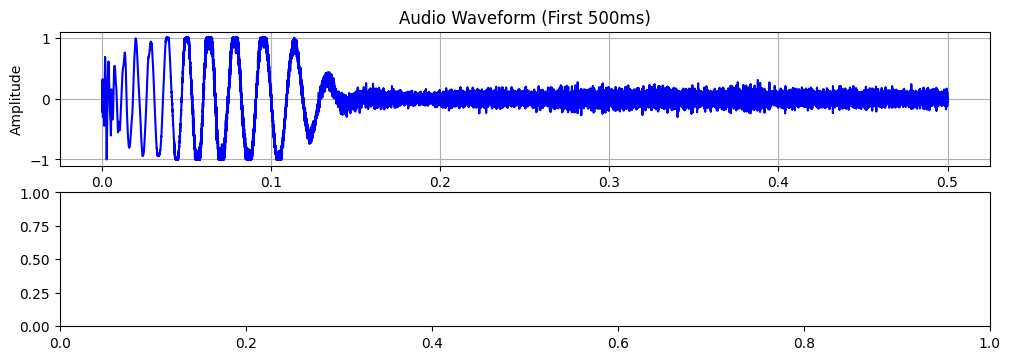

In [14]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
audio_file = "E:/Dataset/Sample_Genre_Classification/Cymatics - Drum Loop 1 - 177 BPM.wav"
y, sr = librosa.load(audio_file, sr=None, mono=True, offset=0.0, duration=1.0)

# Calculate the time array
time = np.linspace(0, len(y) / sr, len(y))

# Calculate the spectral centroid
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

# Split the audio waveform and spectral centroid into two parts (500ms each)
y_first_half = y[:int(sr/2)]
time_first_half = time[:len(y_first_half)]
centroid_first_half = spectral_centroids[:len(y_first_half)]

# Plot the audio waveform and spectral centroid
plt.figure(figsize=(12, 8))

# First subplot: Audio waveform for the first 500ms
plt.subplot(4, 1, 1)
plt.plot(time_first_half, y_first_half, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform (First 500ms)')
plt.grid(True)

# Second subplot: Spectral centroid for the first 500ms
plt.subplot(4, 1, 2)
plt.plot(time_first_half, centroid_first_half, color='r')
plt.xlabel('Time (s)')
plt.ylabel('Spectral Centroid')
plt.title('Spectral Centroid (First 500ms)')
plt.grid(True)

plt.tight_layout()
plt.show()



In [5]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

def identify_sequences(y, sr, threshold=0.5):
  """
  Identifies sequences in an audio waveform based on peak amplitude changes.

  Args:
      y: Audio signal as a numpy array.
      sr: Sampling rate in Hz.
      threshold: Threshold for amplitude change (0-1).

  Returns:
      A list of dictionaries, each containing information about a sequence:
          - length: Length of the sequence in samples.
          - start_time: Start time of the sequence in seconds.
          - end_time: End time of the sequence in seconds.
          - start_freq: Start frequency of the sequence in Hz (estimated).
          - end_freq: End frequency of the sequence in Hz (estimated).
  """
  sequences = []
  current_seq_start = 0
  current_peak = np.abs(y[0])
  for i, sample in enumerate(y):
    peak = np.abs(sample)
    if i == 0:
      # Initialize first sequence
      continue
    if peak > current_peak * (1 + threshold) or peak < current_peak * (1 - threshold):
      # End current sequence and start new one
      sequences.append({
          "length": i - current_seq_start,
          "start_time": current_seq_start / sr,
          "end_time": i / sr,
          "start_freq": librosa.feature.mfcc(y[current_seq_start:i], sr)[0][0],
          "end_freq": librosa.feature.mfcc(y[current_seq_start:i], sr)[0][-1]
      })
      current_seq_start = i
      current_peak = peak
  # Add the last sequence
  sequences.append({
      "length": len(y) - current_seq_start,
      "start_time": current_seq_start / sr,
      "end_time": len(y) / sr,
      "start_freq": librosa.feature.mfcc(y[current_seq_start:], sr)[0][0],
      "end_freq": librosa.feature.mfcc(y[current_seq_start:], sr)[0][-1]
  })
  return sequences

def plot_waveform_with_sequences(y, sr, sequences, title="Audio Waveform"):
  """
  Plots the audio waveform with identified sequences marked.

  Args:
      y: Audio signal as a numpy array.
      sr: Sampling rate in Hz.
      sequences: List of dictionaries containing sequence information.
      title: Title for the plot.
  """
  t = np.arange(0, len(y) / sr, 1 / sr)  # Time axis
  fig, axes = plt.subplots(figsize=(12, 6))
  fig.suptitle(title)
  start = 0
  for i, ax in enumerate(axes):
    end = min(start + 500 * sr, len(y))
    ax.plot(t[start:end], y[start:end])
    for seq in sequences:
      if start <= seq["start_time"] * sr < end and start <= seq["end_time"] * sr < end:
        ax.axvline(x=seq["start_time"], color="green", linestyle="--", label="Start")
        ax.axvline(x=seq["end_time"], color="red", linestyle="--", label="End")
    ax.set_xlim(t[start], t[end])
    ax.set_ylim(np.min(y), np.max(y))
    if i == 0:
      ax.set_ylabel("Amplitude")
    if i == len(axes) - 1:
      ax.set_xlabel("Time (s)")
    start = end
  plt.legend(loc="upper left")
  plt.tight_layout()
  plt.show()

# Load your audio file (replace with your actual file path)
y, sr = librosa.load("E:/Dataset/Sample_Genre_Classification/Cymatics - Drum Loop 1 - 177 BPM.wav")

# Identify sequences
sequences = identify_sequences(y, sr)

# Print information for each sequence
for seq in sequences:
    print(f"Sequence Length: {seq['length']} samples")
    print(f"Start Time: {seq['start_time']} seconds")
    print(f"End Time: {seq['end_time']} seconds")
    print(f"Start Frequency: {librosa.feature.mfcc(y[seq['start_time']:seq['end_time']], sr)[0][0]} Hz")  # Use seq['start_time'] and seq['end_time']
    print(f"End Frequency: {librosa.feature.mfcc(y[seq['start_time']:seq['end_time']], sr)[0][-1]} Hz")  # Use seq['start_time'] and seq['end_time']
    print("---------------------")

# Plot the waveform with identified sequences
plot_waveform_with_sequences(y, sr, sequences)

TypeError: mfcc() takes 0 positional arguments but 2 were given

Sequences found: [(0, 1), (2, 2), (3, 5), (6, 6), (7, 9), (10, 30), (31, 31), (32, 32), (33, 34), (35, 68), (69, 72), (73, 74), (75, 75), (76, 77), (78, 78), (79, 80), (81, 84), (85, 88), (89, 146), (147, 152), (153, 153), (154, 156), (157, 157), (158, 161), (162, 163), (164, 171), (172, 181), (182, 237), (238, 242), (243, 243), (244, 247), (248, 248), (249, 251), (252, 252), (253, 254), (255, 255), (256, 261), (262, 265), (266, 271), (272, 340), (341, 348), (349, 350), (351, 352), (353, 353), (354, 356), (357, 357), (358, 361), (362, 369), (370, 380), (381, 448), (449, 458), (459, 462), (463, 466), (467, 468), (469, 476), (477, 486), (487, 555), (556, 556), (557, 560), (561, 567), (568, 568), (569, 569), (570, 570), (571, 572), (573, 573), (574, 574), (575, 575), (576, 578), (579, 580), (581, 581), (582, 583), (584, 584), (585, 585), (586, 586), (587, 605), (606, 669), (670, 671), (672, 673), (674, 674), (675, 678), (679, 679), (680, 680), (681, 684), (685, 685), (686, 686), (687, 688

TypeError: cannot unpack non-iterable int object

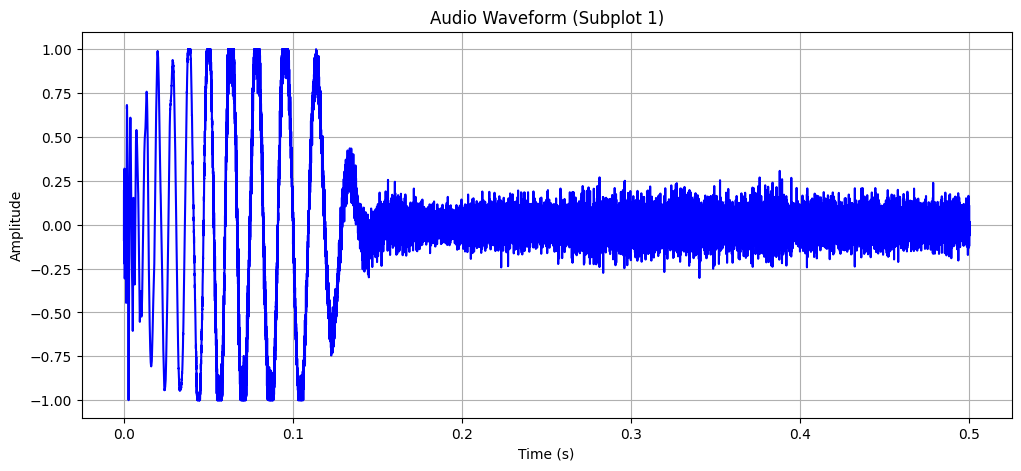

In [12]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

def find_sequences(audio_file):
    # Load the audio file
    y, sr = librosa.load(audio_file, sr=None, mono=True)

    # Calculate peak amplitudes for each cycle
    peaks, _ = find_peaks(y, height=0)

    # Initialize variables
    start_index = 0
    sequences = []

    # Iterate through each cycle
    for i in range(1, len(peaks)):
        # Calculate peak amplitude ratio between current cycle and first cycle in the sequence
        if y[peaks[start_index]] != 0:
            peak_ratio = y[peaks[i]] / y[peaks[start_index]]
        else:
            peak_ratio = 0  # Handle division by zero

        # Check if peak amplitude ratio exceeds the threshold (50% increase/decrease)
        if peak_ratio >= 1.5 or peak_ratio <= 0.5:
            # End current sequence
            end_index = i - 1
            sequences.append((start_index, end_index))
            # Start new sequence
            start_index = i

    # Add the last sequence
    sequences.append((start_index, len(peaks) - 1))

    return sequences


def plot_audio_waveform(audio_file, sequences):
    # Load the audio file
    y, sr = librosa.load(audio_file, sr=None, mono=True)

    # Calculate time array
    time = np.linspace(0, len(y) / sr, len(y))

    # Split audio waveform into subplots of 500ms each
    num_subplots = len(y) // (sr // 2) + 1
    plt.figure(figsize=(12, 6 * num_subplots))

    for i, sequence in enumerate(sequences):
        # Plot the audio waveform
        plt.subplot(num_subplots, 1, i + 1)
        plt.plot(time[sr//2*i:sr//2*(i+1)], y[sr//2*i:sr//2*(i+1)], color='b')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title(f'Audio Waveform (Subplot {i + 1})')
        plt.grid(True)

        # Mark start and end of each sequence
        for start, end in sequence:
            plt.axvline(x=start / sr, color='r', linestyle='--')
            plt.axvline(x=end / sr, color='r', linestyle='--')

    plt.tight_layout()
    plt.show()

# Example usage
audio_file = "E:/Dataset/Sample_Genre_Classification/Cymatics - Drum Loop 1 - 177 BPM.wav"
sequences = find_sequences(audio_file)
print("Sequences found:", sequences)
plot_audio_waveform(audio_file, sequences)


Length of time series data: 1315526


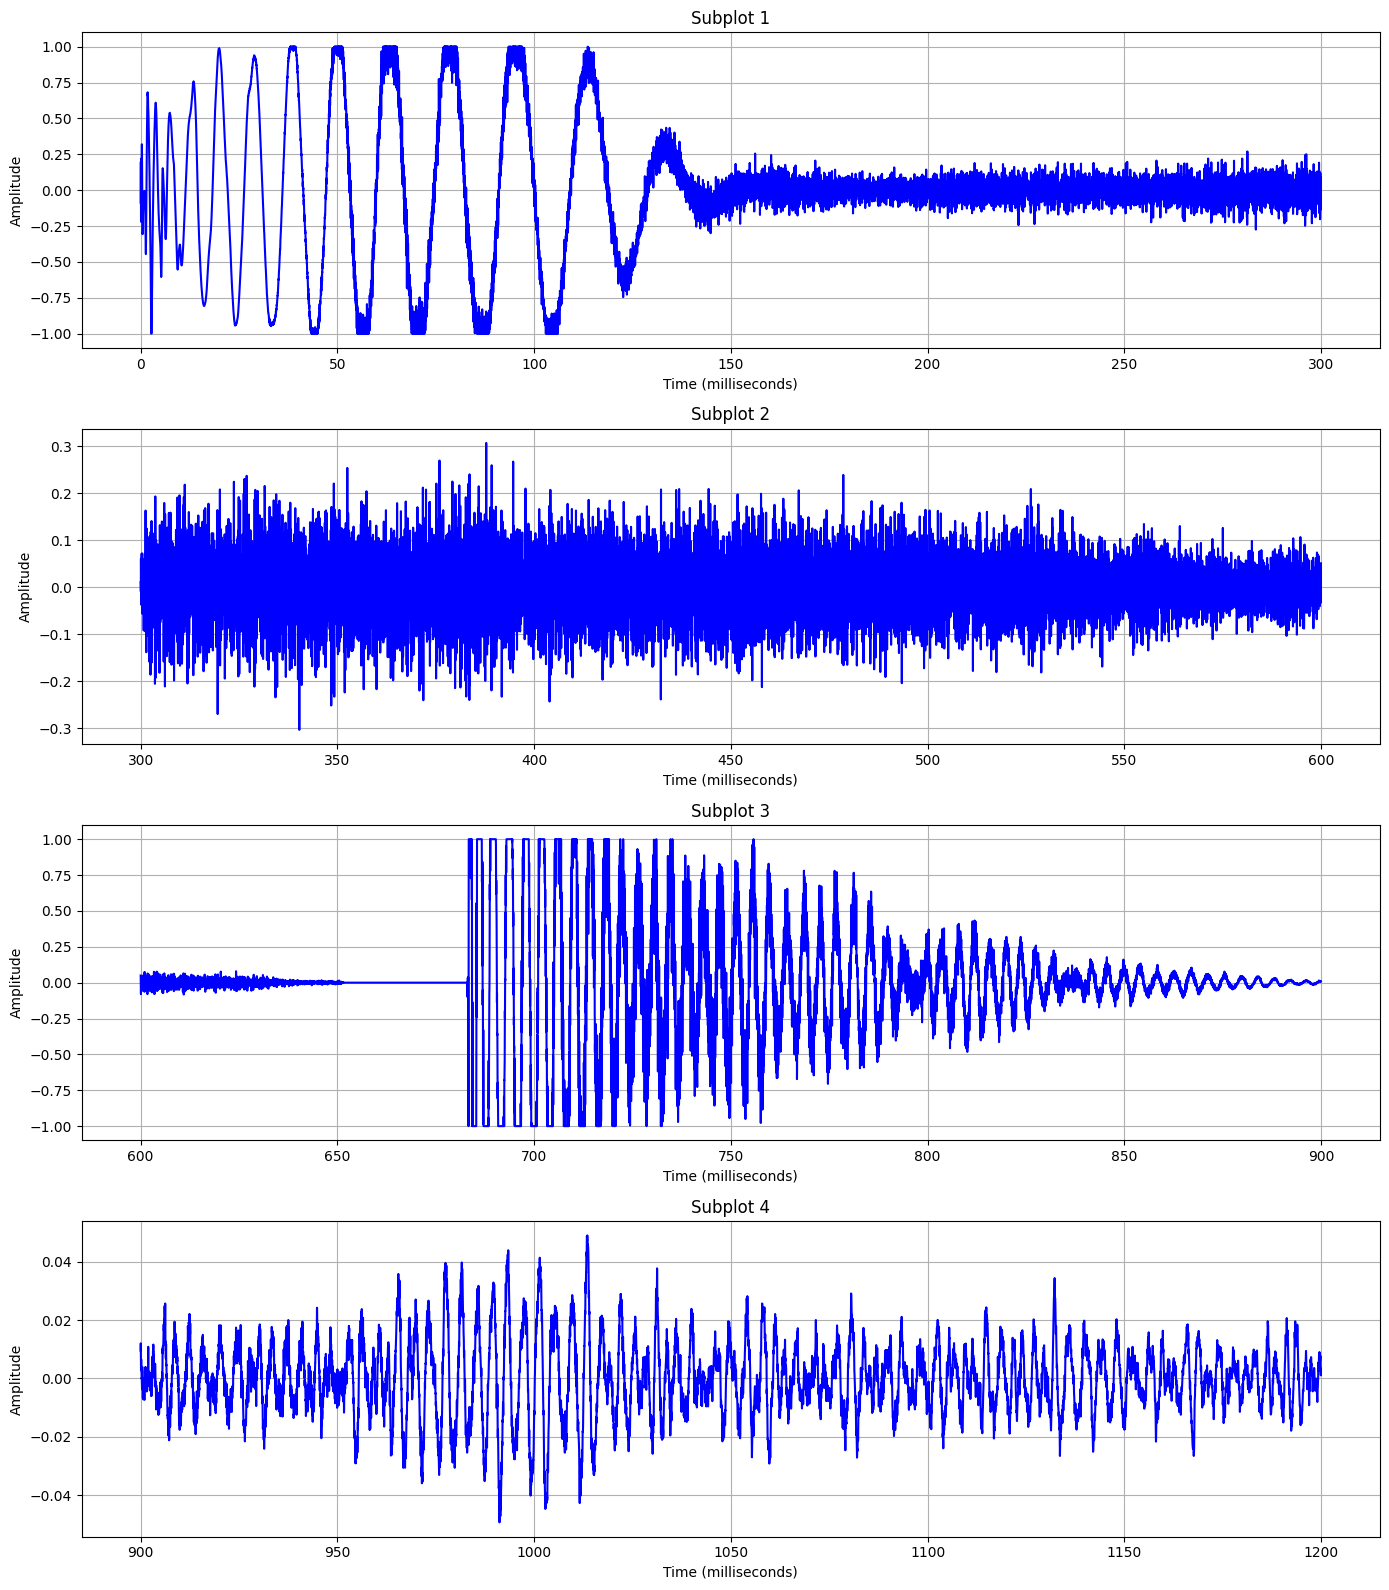

In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Load the audio file
audio_file = "E:/Dataset/Sample_Genre_Classification/Cymatics - Drum Loop 1 - 177 BPM.wav"
y, sr = librosa.load(audio_file, sr=None, dtype=np.float32)

# Normalize the audio to ensure amplitude values are in the range [-1, 1]
y /= np.max(np.abs(y))

# Calculate the time array with a higher precision (10 ms)
time = np.arange(len(y)) / sr
time_ms = time * 1000  # Convert time to milliseconds

# Convert time array to human-readable format
start_time = datetime.datetime.fromtimestamp(0)  # Start time at Unix epoch
time_readable = [start_time + datetime.timedelta(seconds=float(t)) for t in time]

# Print the length of the time series data
print("Length of time series data:", len(time))

# Plot only the first 4 subplots
num_subplots = min(4, int(np.ceil(len(y) / (sr * 0.3))))  # Each subplot represents 300 milliseconds

plt.figure(figsize=(14, 4 * num_subplots))
for i in range(num_subplots):
    start_idx = int(i * sr * 0.3)
    end_idx = int((i + 1) * sr * 0.3)
    plt.subplot(num_subplots, 1, i + 1)
    plt.plot(time_ms[start_idx:end_idx], y[start_idx:end_idx], color='b')
    plt.xlabel('Time (milliseconds)')
    plt.ylabel('Amplitude')
    plt.title(f'Subplot {i+1}')
    plt.grid(True)

plt.tight_layout()
plt.show()



In [17]:
import librosa
import numpy as np

def find_positive_peak_cycles(audio_file, window_size=1024, hop_length=512):
    # Load the audio file
    y, sr = librosa.load(audio_file, sr=None)
    
    # Calculate the onset envelope
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    
    # Find peaks in the onset envelope
    peaks = librosa.util.peak_pick(onset_env, pre_max=20, post_max=20, pre_avg=20, post_avg=20, delta=0.1, wait=1)
    
    # Initialize lists to store positive peak values and corresponding times
    peak_values = []
    peak_times = []
    
    # Iterate through each peak
    for peak in peaks:
        # Define start and end time of the cycle in milliseconds
        start_time = librosa.frames_to_time(peak - window_size//2, sr=sr) * 1000
        end_time = librosa.frames_to_time(peak + window_size//2, sr=sr) * 1000
        
        # Ensure the window indices are within bounds
        window_start = max(0, peak - window_size//2)
        window_end = min(len(y), peak + window_size//2)
        
        # Find the positive peak value within the window if the window is not empty
        if window_start < window_end:
            peak_value = np.max(y[window_start:window_end])
            # Append the peak value and times to respective lists
            peak_values.append(peak_value)
            peak_times.append((start_time, end_time))
    
    return peak_values, peak_times

# Example usage
audio_file = 'E:/Dataset/Sample_Genre_Classification/Cymatics - Drum Loop 1 - 177 BPM.wav'
peaks, times = find_positive_peak_cycles(audio_file)

# Print the positive peak values and corresponding times
for i, (peak, time) in enumerate(zip(peaks, times)):
    print(f"Cycle {i+1}: Peak Value: {peak}, Start Time: {time[0]} ms, End Time: {time[1]} ms")


Cycle 1: Peak Value: 0.681938648223877, Start Time: -5874.648526077097 ms, End Time: 6013.9682539682535 ms
Cycle 2: Peak Value: 0.681938648223877, Start Time: -5247.7097505668935 ms, End Time: 6640.907029478458 ms
Cycle 3: Peak Value: 0.7578491568565369, Start Time: -4574.331065759637 ms, End Time: 7314.285714285714 ms
Cycle 4: Peak Value: 0.7578491568565369, Start Time: -4156.371882086168 ms, End Time: 7732.244897959184 ms
Cycle 5: Peak Value: 0.7578491568565369, Start Time: -3889.342403628118 ms, End Time: 7999.274376417233 ms
Cycle 6: Peak Value: 0.7578491568565369, Start Time: -3215.9637188208617 ms, End Time: 8672.65306122449 ms
Cycle 7: Peak Value: 0.7578491568565369, Start Time: -2542.5850340136058 ms, End Time: 9346.031746031747 ms
Cycle 8: Peak Value: 0.7578491568565369, Start Time: -2182.675736961451 ms, End Time: 9705.9410430839 ms
Cycle 9: Peak Value: 0.9105991721153259, Start Time: -1857.5963718820863 ms, End Time: 10031.020408163266 ms
Cycle 10: Peak Value: 0.988637447357

In [8]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load and preprocess data
data_dir = "E:/Dataset/Sample_Genre_Classification/snare"
snare_types = ["dubstep", "future_bass", "hip_hop", "house", "lofi", "trap"]

X = []
y = []

# Extract features
for snare_type in snare_types:
    snare_files = os.listdir(os.path.join(data_dir, snare_type))
    for snare_file in snare_files:
        audio_file = os.path.join(data_dir, snare_type, snare_file)
        features = extract_features(audio_file)
        X.append(features)
        y.append(snare_type)

# Convert to numpy array
X = np.array(X)
y = np.array(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for i in range(X.shape[1]):
    print(f"{i + 1}. Feature {indices[i]}: {feature_importances[indices[i]]}")

# Select the top k features (e.g., top 5)
k = 5
top_k_features = indices[:k]
print(f"\nTop {k} features:")
for i, feature_index in enumerate(top_k_features):
    print(f"{i + 1}. Feature {feature_index}: {feature_importances[feature_index]}")


Feature extraction completed and saved to snare_features.csv
